In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
eps = np.finfo(float).eps
tiny = 100*eps

In [47]:
def get_stepsize(interval, steps):
    return (interval[1] - interval[0])/steps

In [48]:
'''
@param funcp_sys: a system of diffeqs
@param init_sys : a system of initial conditions
@param interval : the interval on which to approximate a solution
@param steps    : the number of steps with which to approximate a solution

@returns step_set  : the list of discrete independent variable steps
@returns output_set: the list of discrete dependent variable values
        
'''
def forward_euler(funcp_sys, init_sys, interval, steps):
    stepsize = get_stepsize(interval, steps)
    step_set = [init_sys[0][0] + i*stepsize for i in range(steps)]
    #initialize inital points of the approximate solution system
    system_sets = [[init[1]] for init in init_sys]
    #for each timestep
    for i, t in enumerate(step_set):
        #for each function in the system
        for j, f in enumerate(funcp_sys):
            #calculate the approximate next value of that function
            system_sets[j].append(system_sets[j][i] + stepsize * f(t, system_sets))
    return step_set, system_sets[0][:-1]

In [49]:
def adaptive_forward_euler(fpp, funcp_sys, init_sys, interval, tol):
    #Only works for first order odes
    #fpp_order = len(funcp_sys) + 1    
    step_set = [init_sys[0][0]]
    system_sets = [[init[1]] for init in init_sys]
    stepsize_coeff = lambda t, fs: np.abs(2*tol/fpp(step_set[-1], system_sets))**.5
    stepsize = stepsize_coeff(step_set[-1], system_sets)
    while step_set[-1] < interval[1] and len(step_set) < 1000:
        t = step_set[-1]
        stepsize = stepsize * stepsize_coeff(t, system_sets)
        #estimate LTE
        LTE = (stepsize**2 / 2) * fpp(t, system_sets)
        if LTE <= tol:
            #compute new stepsize
            step_set.append(t + stepsize)
            for j, f in enumerate(funcp_sys):
                #compute the approximate next value of that function
                system_sets[j].append(system_sets[j][-1] + stepsize * f(t, system_sets))
    return step_set, system_sets[0]

In [55]:
true1 = lambda t: 2*(np.e**(t-1))
funcp_sys1 = [lambda t, system_sets: system_sets[0][-1]]
init_sys1 = [(1,2)]
interval1 = (1,4)
func1 = [true1, funcp_sys1, init_sys1, interval1]

In [56]:
true2 = lambda t: 2*(np.e**(1-t**2))
funcp_sys2 = [lambda t, system_sets: -2*t*system_sets[0][-1]]
init_sys2 = [(1,2)]
interval2 = (1,4)
func2 = [true2, funcp_sys2, init_sys2, interval2]

In [57]:
true3 = lambda t: np.sin(t)
#This parses the solution matrix for the values needed for calculating
#the next values in the differential system (effectively grabs the correct f prime)
#Possible change: change -1 index dependency by correctly referencing t value.
funcp_sys3 = [lambda t, system_sets:  system_sets[1][-1],  #u'(t) = v(t)
              lambda t, system_sets: -system_sets[0][-1]]  #v'(t) = -u(t)
init_sys3 = [(0,0), (0,1)]
interval3 = (0,2*np.pi)
func3 = [true3, funcp_sys3, init_sys3, interval3]

In [58]:
def run_forward_euler(true_func, funcp_sys, init_sys, interval, steps):
    xs, ys = forward_euler(funcp_sys, init_sys, interval, steps)
    trues = [true_func(t) for t in xs]
    plt.plot(xs, ys, 'o', xs, trues)
    return xs, [np.abs(ys[i] - trues[i]) for i in range(len(xs))]

In [59]:
def run_adaptive_forward_euler(fpp, true_func, funcp_sys, init_sys, interval, tol):
    xs, ys = adaptive_forward_euler(fpp, funcp_sys, init_sys, interval, tol)
    print("xs: {}, ys: {}".format(len(xs), len(ys)))
    trues = [true_func(t) for t in xs]
    #plt.plot(xs, ys, 'o', xs, trues)
    plt.plot(xs, trues)

xs: 1000, ys: 1000


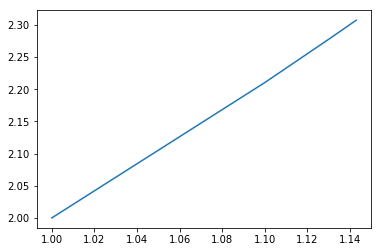

In [60]:
run_adaptive_forward_euler(lambda t, sys_sets: sys_sets[0][-1], *func1, .1)

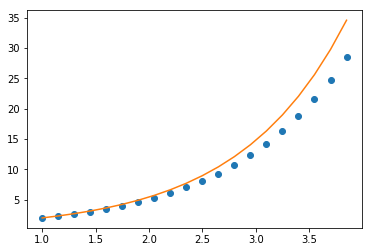

In [61]:
LTEs = run_forward_euler(*func1, 20)

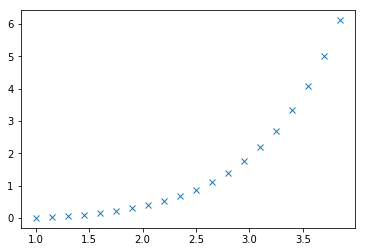

In [62]:
plt.plot(*LTEs, 'x')

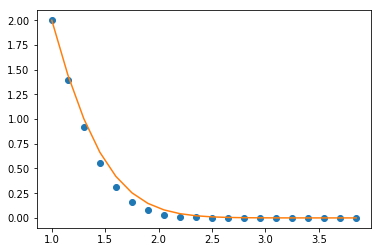

In [63]:
LTEs = run_forward_euler(*func2, 20)

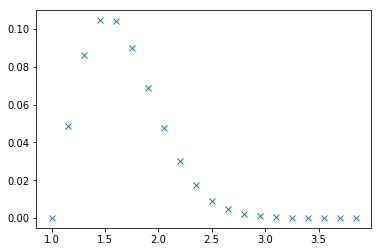

In [64]:
plt.plot(*LTEs, 'x')

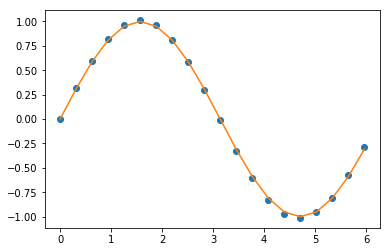

In [65]:
LTEs = run_forward_euler(*func3, 20)

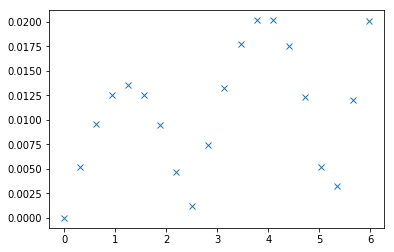

In [66]:
plt.plot(*LTEs, 'x')